In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
N = 100
J = 1
np.set_printoptions(suppress=True)

def neighbours(x,y):
    suma = (sigma[(x + 1) % N][y] + 
            sigma[(x - 1) % N][y] + 
            sigma[x][(y + 1) % N] + 
            sigma[x][(y - 1) % N])
    return suma

def energy():
    E = 0
    for i in range(N):
        for j in range(N):
            E += -sigma[i][j] * neighbours(i, j)
    return E / 2

def acceptance_probability(delta_E, temperature):
    if delta_E < 0:
        return 1
    else:
        return np.exp(-delta_E / temperature)

In [3]:
# Tablice prawdopodobieństw akceptacji
prob_acceptance_1 = np.zeros((2, 5))  # Dla 2 możliwych wartości spinu i 5 możliwych sum sąsiednich spinów
T = 0.5
for i, sigma_i in enumerate([-1, 1]):
    for j, suma in enumerate([-4, -2, 0, 2, 4]):
        dE = sigma_i * suma * 2 # mnozenie przez 2 wynika ze zmiany spinu i na przeciwny
        p = acceptance_probability(dE, T)
        prob_acceptance_1[i][j] = min(1, p)
print(f"Tablica prawdopodobieństw akceptacji dla T = {T}")
print(np.round(prob_acceptance_1, 7))

Tablica prawdopodobieństw akceptacji dla T = 0.5
[[0.0000001 0.0003355 1.        1.        1.       ]
 [1.        1.        1.        0.0003355 0.0000001]]


In [4]:
# Tablice prawdopodobieństw akceptacji
prob_acceptance_2 = np.zeros((2, 5))  # Dla 2 możliwych wartości spinu i 5 możliwych sum sąsiednich spinów
T = 2.5
for i, sigma_i in enumerate([-1, 1]):
    for j, suma in enumerate([-4, -2, 0, 2, 4]):
        dE = sigma_i * suma * 2 # mnozenie przez 2 wynika ze zmiany spinu i na przeciwny
        p = acceptance_probability(dE, T)
        prob_acceptance_2[i][j] = min(1, p)
print(f"Tablica prawdopodobieństw akceptacji dla T = {T}")
print(np.round(prob_acceptance_2, 7))

Tablica prawdopodobieństw akceptacji dla T = 2.5
[[0.0407622 0.2018965 1.        1.        1.       ]
 [1.        1.        1.        0.2018965 0.0407622]]


In [8]:
# Tablice prawdopodobieństw akceptacji
prob_acceptance_3 = np.zeros((2, 5))  # Dla 2 możliwych wartości spinu i 5 możliwych sum sąsiednich spinów
T = 4.0
for i, sigma_i in enumerate([-1, 1]):
    for j, suma in enumerate([-4, -2, 0, 2, 4]):
        dE = sigma_i * suma * 2 # mnozenie przez 2 wynika ze zmiany spinu i na przeciwny
        p = acceptance_probability(dE, T)
        prob_acceptance_3[i][j] = min(1, p)
print(f"Tablica prawdopodobieństw akceptacji dla T = {T}")
print(np.round(prob_acceptance_3, 7))

Tablica prawdopodobieństw akceptacji dla T = 4.0
[[0.1353353 0.3678794 1.        1.        1.       ]
 [1.        1.        1.        0.3678794 0.1353353]]


### Zadanie 2

In [9]:
def metropolis_step(temperature):
    global sigma
    x = np.random.randint(0, N)
    y = np.random.randint(0, N)
    delta_E = 2 * sigma[x][y] * neighbours(x, y)
    p = acceptance_probability(delta_E, temperature)
    if np.random.rand() < p:
        sigma[x][y] *= -1

In [10]:
temperatures = [0.5, 2.5, 4.0]
magnetizations = []

for T in temperatures:
    sigma = np.ones((N, N), dtype=int)
    for _ in range(10**5):
        metropolis_step(T)
    
    # Obliczanie gęstości namagnesowania
    M = np.sum(sigma) / N**2
    magnetizations.append(M)
    
    # Zapisanie stanu sieci
    with open(f"state_T_{T}.txt", "w") as f:
        for x in range(N):
            for y in range(N):
                f.write(f"{x} {y} {sigma[x][y]}\n")

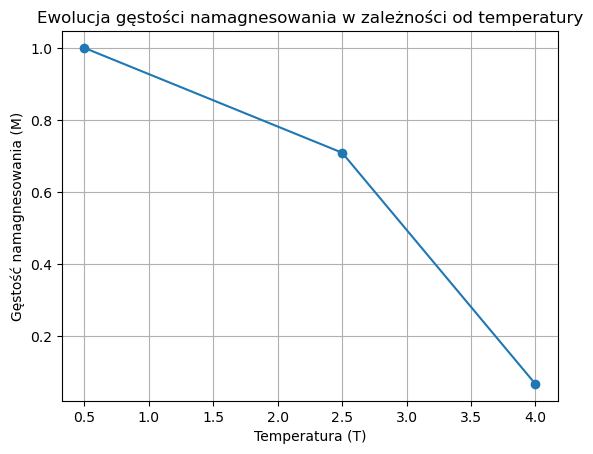

In [11]:
plt.plot(temperatures, magnetizations, marker='o')
plt.xlabel('Temperatura (T)')
plt.ylabel('Gęstość namagnesowania (M)')
plt.title('Ewolucja gęstości namagnesowania w zależności od temperatury')
plt.grid(True)
plt.show()

### Zadanie 3

In [12]:
# Funkcja do wczytywania stanu sieci z pliku
def read_state(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        state = np.zeros((N, N), dtype=int)
        for line in lines:
            x, y, s = map(int, line.split())
            state[x][y] = s
    return state

# Funkcja do wizualizacji stanu sieci
def plot_spin_map(state, temperature):
    plt.figure()
    plt.imshow(state, cmap='binary', interpolation='nearest')
    plt.title(f"Mapa wartości spinowych dla T = {temperature}")
    plt.xlabel('y')
    plt.ylabel('x')
    plt.colorbar(label='Wartość spinu')
    plt.show()

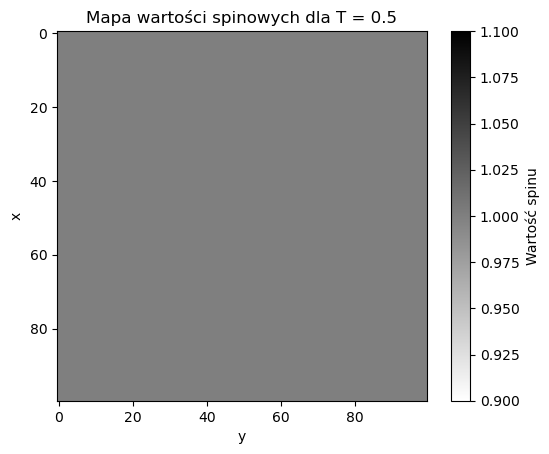

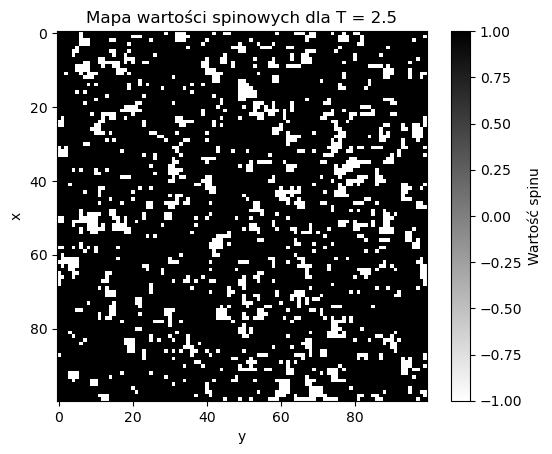

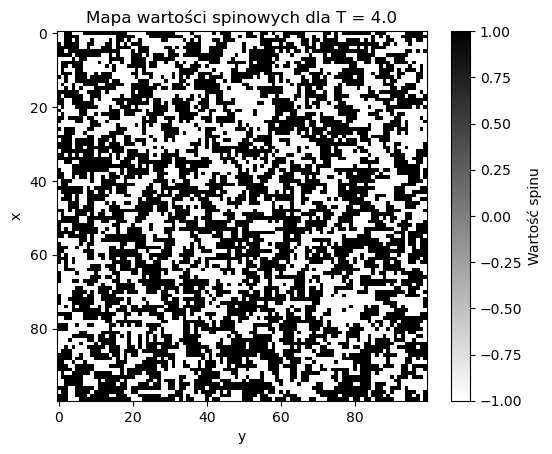

In [13]:
# Wczytanie stanów sieci dla różnych temperatur
temperatures = [0.5, 2.5, 4.0]

for T in temperatures:
    file_path = f"state_T_{T}.txt"
    state = read_state(file_path)
    # Wizualizacja stanu sieci
    plot_spin_map(state, T)

### Zadanie 4

In [14]:
def average_magnetization(T, tau=10**4, steps=10**5):
    M_sum = 0
    M2_sum = 0
    for _ in range(steps):
        metropolis_step(T)
        M = np.sum(sigma) / N**2
        M2 = M**2
        if steps - _ <= tau:
            M_sum += M
            M2_sum += M2
    avg_M = M_sum / tau
    avg_M2 = M2_sum / tau
    return avg_M, avg_M2

In [15]:
temperatures = np.arange(1.4, 3.05, 0.05)

m = []
CHI = []

for T in temperatures:
    avg_M, avg_M2 = average_magnetization(T)
    m.append(avg_M / N**2)
    susceptibility = (avg_M2 - avg_M**2) / (T * N**2)
    CHI.append(susceptibility)

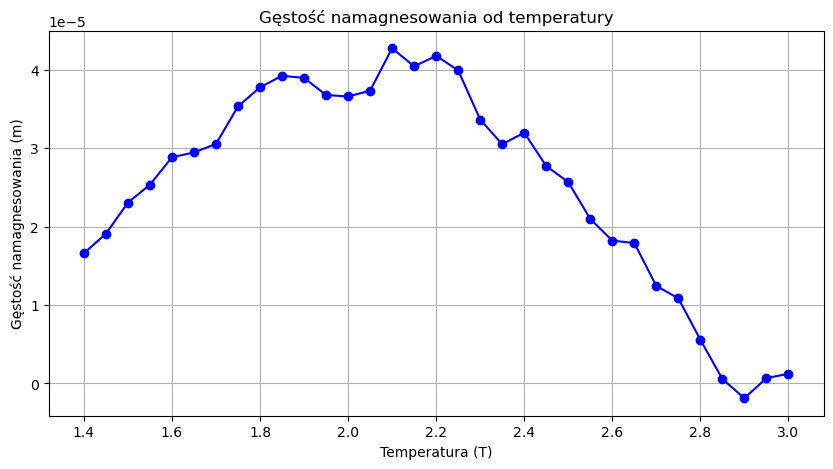

In [16]:
# Wykres gęstości namagnesowania od temperatury
plt.figure(figsize=(10, 5))
plt.plot(temperatures, m, marker='o', color='blue')
plt.xlabel('Temperatura (T)')
plt.ylabel('Gęstość namagnesowania (m)')
plt.title('Gęstość namagnesowania od temperatury')
plt.grid(True)
plt.show()

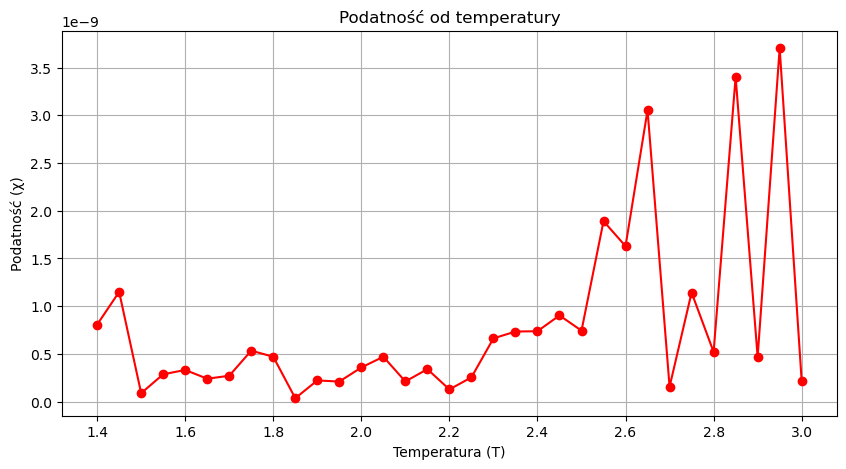

In [17]:
# Wykres podatności od temperatury
plt.figure(figsize=(10, 5))
plt.plot(temperatures, CHI, marker='o', color='red')
plt.xlabel('Temperatura (T)')
plt.ylabel('Podatność (χ)')
plt.title('Podatność od temperatury')
plt.grid(True)
plt.show()